# `ImageMath`&nbsp;模块

这个&nbsp;`ImageMath`&nbsp;模块可用于计算“图像表达式”。该模块提供一个&nbsp;`eval()`&nbsp;函数，它获取表达式字符串和一个或多个图像。

## 示例：使用&nbsp;`ImageMath`&nbsp;模块

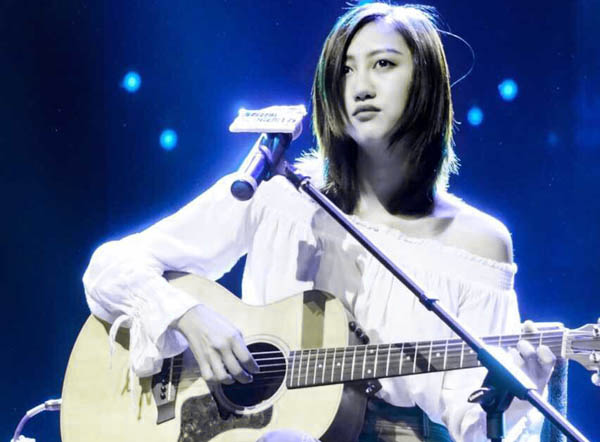

In [7]:
from PIL import Image, ImageMath

r,g,b = (Image.open("cl2.jpg")).split()

r1 = ImageMath.eval("convert(min(a, b), 'L')", a=r, b=g)

Image.merge('RGB',(r1,g,b))


`PIL.ImageMath.eval`(_expression_,&nbsp;_environment_)

 在给定环境中计算表达式。
         在当前版本中，&nbsp;`ImageMath`&nbsp;仅支持单层图像。要处理多波段图像，请使用&nbsp;`split()`&nbsp;方法或&nbsp;`merge()`&nbsp;功能。
 * 
     :    *  **expression**&nbsp;-- 使用标准python表达式语法的字符串。除了标准运算符之外，还可以使用下面描         *  **environment**&nbsp;-- 将图像名称映射到图像实例的字典。您可以使用一个或多个关键字参数而不是字典，如上面的示例所示。注意，名称必须是有效的python标识符*      *  
    :    图像、整数值、浮点值或像素元组，取决于表达式。

## 表达式语法

表达式是标准的python表达式，但它们是在非标准环境中计算的。您可以像往常一样使用pil方法，加上以下一组运算符和函数：

### 标准操作员

您可以使用标准的算术运算符进行加法（+）、减法（-）、乘法（*）和除法（/）。

该模块还支持一元减号（-）、模（%）和幂（**）运算符。

请注意，根据需要，所有操作都是用32位整数或32位浮点值完成的。例如，如果添加两个8位图像，结果将是一个32位整数图像。如果将浮点常量添加到8位图像中，结果将是32位浮点图像。

您可以使用&nbsp;`convert()`&nbsp;，&nbsp;`float()`&nbsp;和&nbsp;`int()`&nbsp;功能描述如下。

### 位运算符

该模块还提供对单个位进行操作的操作。这包括和（&）或（）和独占或（^）。您还可以反转（~）所有像素位。

注意，在应用按位运算之前，操作数被转换为32位有符号整数。这意味着，如果反转普通灰度图像，将得到负值。您可以使用and（&）运算符屏蔽不需要的位。

位运算符不适用于浮点图像。

### 逻辑运算符

逻辑运算符&nbsp;`and`&nbsp;，&nbsp;`or`&nbsp;和&nbsp;`not`&nbsp;处理整个图像，而不是单个像素。

空图像（所有像素为零）将被视为假。所有其他图像均视为真。

注意&nbsp;`and`&nbsp;和&nbsp;`or`&nbsp;返回上次计算的操作数，但不总是返回布尔值。

### 内置功能

这些功能应用于每个单独的像素。

`abs`(_image_)
+ 绝对值。

`convert`(_image_,&nbsp;_mode_)
+ 将图像转换为给定模式。模式必须作为字符串常量提供。

`float`(_image_)
+ 将图像转换为32位浮点。这相当于转换（图像，“f”）。

`int`(_image_)
+ 将图像转换为32位整数。这相当于转换（图像，“i”）。
    
    请注意，如果需要获得正确的结果，1位和8位图像将自动转换为32位整数。

`max`(_image1_,&nbsp;_image2_)
+ 最大值。

`min`(_image1_,&nbsp;_image2_)